In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, matplotlib as mpl
import random

import mplhep as hep

hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [2]:
import beampipe_parameters
beampipe0=beampipe_parameters.Beampipe()

In [3]:
# make an eta vs acceptance plot like those in the HCal Insert paper

In [55]:
def draw_mask(layer, beampipe=beampipe0, fontsize=18, linewidth=0.5):
    holeX=beampipe.holeX(layer)
    holeR=beampipe.holeR(layer)
    beampipeX=beampipe.beampipeX(layer)
    beampipeR=beampipe.beampipeR(layer)
    z=beampipe.getZ(layer)
    #D hole
    plt.gca().add_patch(plt.Circle((holeX, 0), holeR, color='#ffffff', zorder=99))    
    plt.gca().add_patch(plt.Rectangle((holeX, -holeR), -holeX, holeR*2, color='#ffffff', zorder=99))
    #top
    plt.gca().add_patch(plt.Rectangle((24.8-69.6,29.9), 69.6,4.8, color='#ffffff', zorder=99))
    #bottom
    plt.gca().add_patch(plt.Rectangle((24.8-69.6,-34.8), 69.6,-29.9+34.8, color='#ffffff', zorder=99))
    #right
    plt.gca().add_patch(plt.Rectangle((19.8,-34.8), -19.8+24.8,69.6, color='#ffffff', zorder=99))
    #left
    plt.gca().add_patch(plt.Rectangle((-39.8-5.0,-34.8), 5.0,69.6, color='#ffffff', zorder=99))
    
    #gap
    plt.gca().add_patch(plt.Rectangle((-0.2,-29.9), 0.4, 59.8, color='#ffffff', zorder=99))
    
    #draw beampipe
    phi= np.linspace(0, 2*np.pi, 101)
    plt.plot(beampipeX+beampipeR*np.cos(phi), beampipeR*np.sin(phi), color='k', linewidth=linewidth, zorder=100)
    plt.plot(beampipeX+(beampipeR+.2)*np.cos(phi), (beampipeR+.2)*np.sin(phi), color='k', linewidth=linewidth, zorder=100)



    #draw outline of sensor
    plt.plot([holeX,-.2,-.2,-39.8,-39.8, -.2, -.2, holeX], [-holeR,-holeR,-29.9, -29.9, 29.9, 29.9,holeR, holeR], 
             color='k', linewidth=linewidth,zorder=100)
    phi = np.linspace(-np.pi/2, np.pi/2, 25)
    plt.plot(holeX-np.cos(phi)*holeR, holeR*np.sin(phi), color='k', linewidth=linewidth, zorder=100)


    phi0 = np.arccos((holeX-.2)/holeR)
    plt.plot([.2,.2,19.8,19.8, .2, .2], [-holeR*np.sin(phi0),-29.9, -29.9, 29.9, 29.9, 
                                               holeR*np.sin(phi0)], color='k', linewidth=linewidth, zorder=100)
    phi = np.linspace(phi0,2*np.pi-phi0, 25)
    plt.plot(holeX-np.cos(phi)*holeR, holeR*np.sin(phi), color='k', linewidth=linewidth,zorder=100)
    
    #next label the z axis, beampipe center, and z* axis
    plt.plot([0],[0], marker="s", zorder=100, color='b', markersize=10)
    plt.text(0,0, " $z$", color='b', fontsize=fontsize*1.5, horizontalalignment='left', zorder=100)
    
    plt.plot([-z*.025],[0], marker='*', zorder=100, color='r', markersize=10)
    plt.text(-z*.025,0, " $z^*$", color='r', fontsize=fontsize*1.5, 
             horizontalalignment='left', zorder=100)
    
    #draw arrows indicating clearance and beampipe radii, including arrowheads
    arrowhead=0.8
    args=dict(marker="",linestyle='-', zorder=100, color='k', linewidth=linewidth*1.5)
    plt.plot([holeX, holeX],[0, beampipeR], **args)
    plt.plot([holeX+arrowhead, holeX, holeX-arrowhead], [beampipeR-arrowhead, beampipeR, beampipeR-arrowhead], **args)
    plt.plot([holeX+arrowhead, holeX, holeX-arrowhead], [arrowhead, 0, arrowhead], **args)
    plt.plot([holeX],[0], marker='o', zorder=100, color='k')
    plt.plot([holeX, holeX],[-beampipeR, -holeR], **args)
    plt.plot([holeX+arrowhead, holeX, holeX-arrowhead], [-beampipeR-arrowhead, -beampipeR, -beampipeR-arrowhead], **args)
    plt.plot([holeX+arrowhead, holeX, holeX-arrowhead], [-holeR+arrowhead, -holeR, -holeR+arrowhead], **args)
    plt.text(holeX, beampipeR/2, f" {beampipeR:.2f} cm", zorder=100, verticalalignment='center', fontsize=fontsize)
    plt.text(holeX, -(holeR+beampipeR)/2, f" {holeR-beampipeR:.2f} cm", zorder=100, verticalalignment='center', fontsize=fontsize)
    

In [56]:
beamTheta=-0.025
def eta_plot(layer, beampipe=beampipe0, fontsize=17, linewidth_scale=1):
    holeX=beampipe.holeX(layer)
    holeR=beampipe.holeR(layer)
    z=beampipe.getZ(layer)
    
    for i,eta in enumerate(reversed(np.linspace(3.2, 4.0,9))):
              
        ls = ["--", ":", "-.", "-", (0, (3, 3, 1, 3, 1, 3)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 3, 1, 3)), (0, (5, 5)), (0,(3,1.4))][i]
        
        #for the legend
        a=plt.plot([],[], label= f"$\eta^*$={eta:.1f}", 
                   linewidth=3*linewidth_scale if eta==3.7 else 2*linewidth_scale)
        color= a[0].get_color()
        
        if layer == -1:
            continue
        
        tanTheta=np.tan(2*np.arctan(np.exp(-eta)))
        phi= np.linspace(0, 2*np.pi, 100)
        uxp = tanTheta*np.cos(phi)
        uyp = tanTheta*np.sin(phi)
        uzp = 1
        
        ux = uxp*np.cos(beamTheta)+uzp*np.sin(beamTheta)
        uy = uyp
        uz = -uxp*np.sin(beamTheta)+uzp*np.cos(beamTheta)
        
        ux/=uz
        uy/=uz
        uz/=uz
        
        
        x,y = ux*z, uy*z
        plt.plot(x, y, color=color, linestyle=ls, marker='', 
                 linewidth=3*linewidth_scale if eta==3.7 else 2*linewidth_scale)
              
        
        


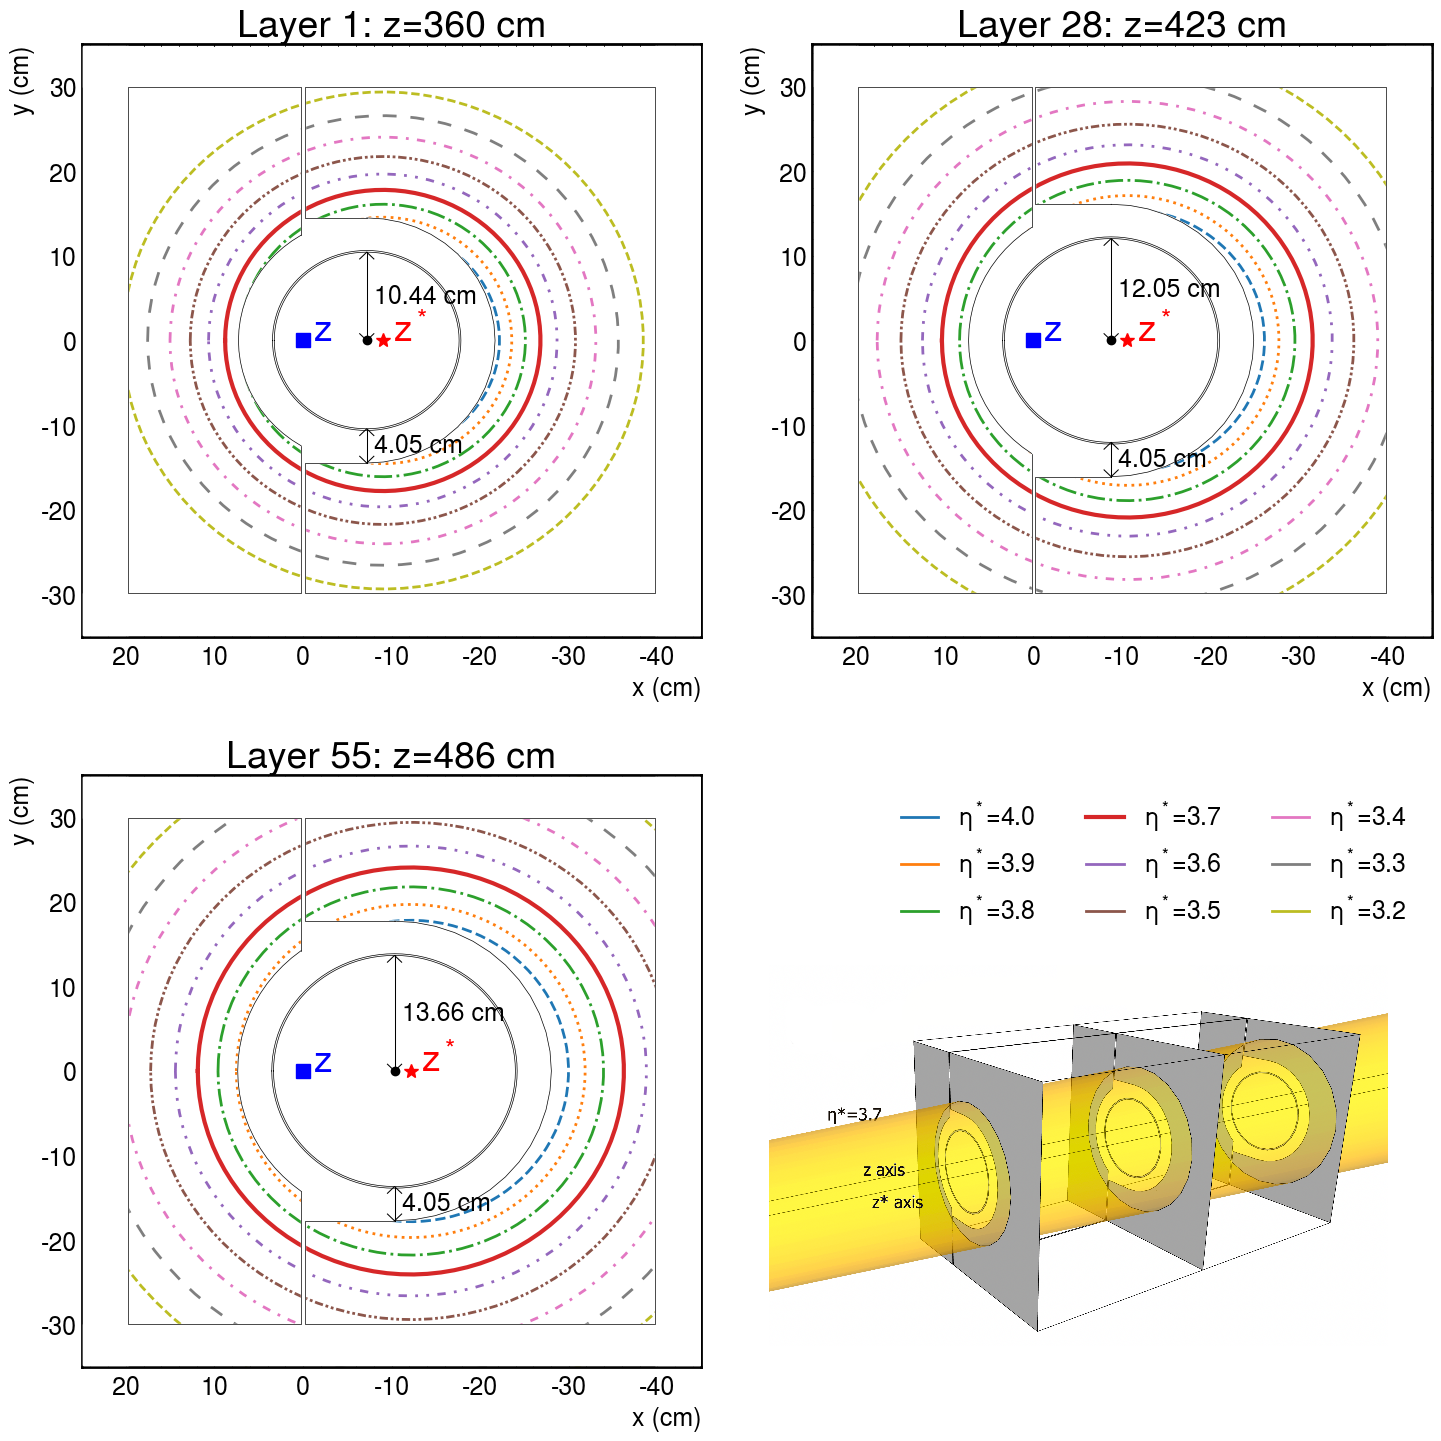

In [57]:
#similar to the plot in the HCal Insert paper
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

fig, axs= plt.subplots(2, 2, figsize=(15, 15), sharex=True, sharey=True)
axs[0][0].set_ylim(-35, 35)
axs[0][0].set_xlim(-45, 25)

beampipe=beampipe0

for i, layer in enumerate((0, 27, 54, -1)):
    plt.sca(axs[i//2][i%2])
    eta_plot(layer)
    if layer != -1:
        plt.title(f"Layer {layer+1}: z={beampipe.getZ(layer):.0f} cm", fontsize=27)
        #draw_hexagons(layer, hexArea[layer], alpha=0.2)
        draw_mask(layer)
        plt.xlabel("x (cm)", fontsize=18)
        plt.ylabel("y (cm)", fontsize=18)
        plt.gca().invert_xaxis()
        #plt.text(40, 30, f"clearance={clearance} cm", zorder=100)
axs[1][1].legend(ncol=3, loc="upper right", framealpha=0, fontsize=18)
plt.sca(axs[i//2][i%2])
arr = mpimg.imread('acceptance.png')
zoom=0.17
xy=(-5, -10)
#axs[1][1].set_ylim(0,1)
#axs[1][1].set_xlim(0,1)
imagebox = OffsetImage(arr, zoom=zoom,)
ab = AnnotationBbox(imagebox, xy, frameon=False)
axs[1][1].add_artist(ab)
axs[0][1].tick_params(labelbottom=True, labelsize=18)
axs[0][1].tick_params(labelleft=True, labelsize=18)
axs[0][0].tick_params(labelbottom=True, labelsize=18)
axs[1][0].tick_params(labelsize=18)
axs[1][1].axis('off')
#outdir="plots"
#plt.savefig(f"{outdir}/acceptance_{clearance}cm_clearance.pdf")
#plt.savefig(f"{outdir}/acceptance_{clearance}cm_clearance.png")
plt.tight_layout()
plt.show()

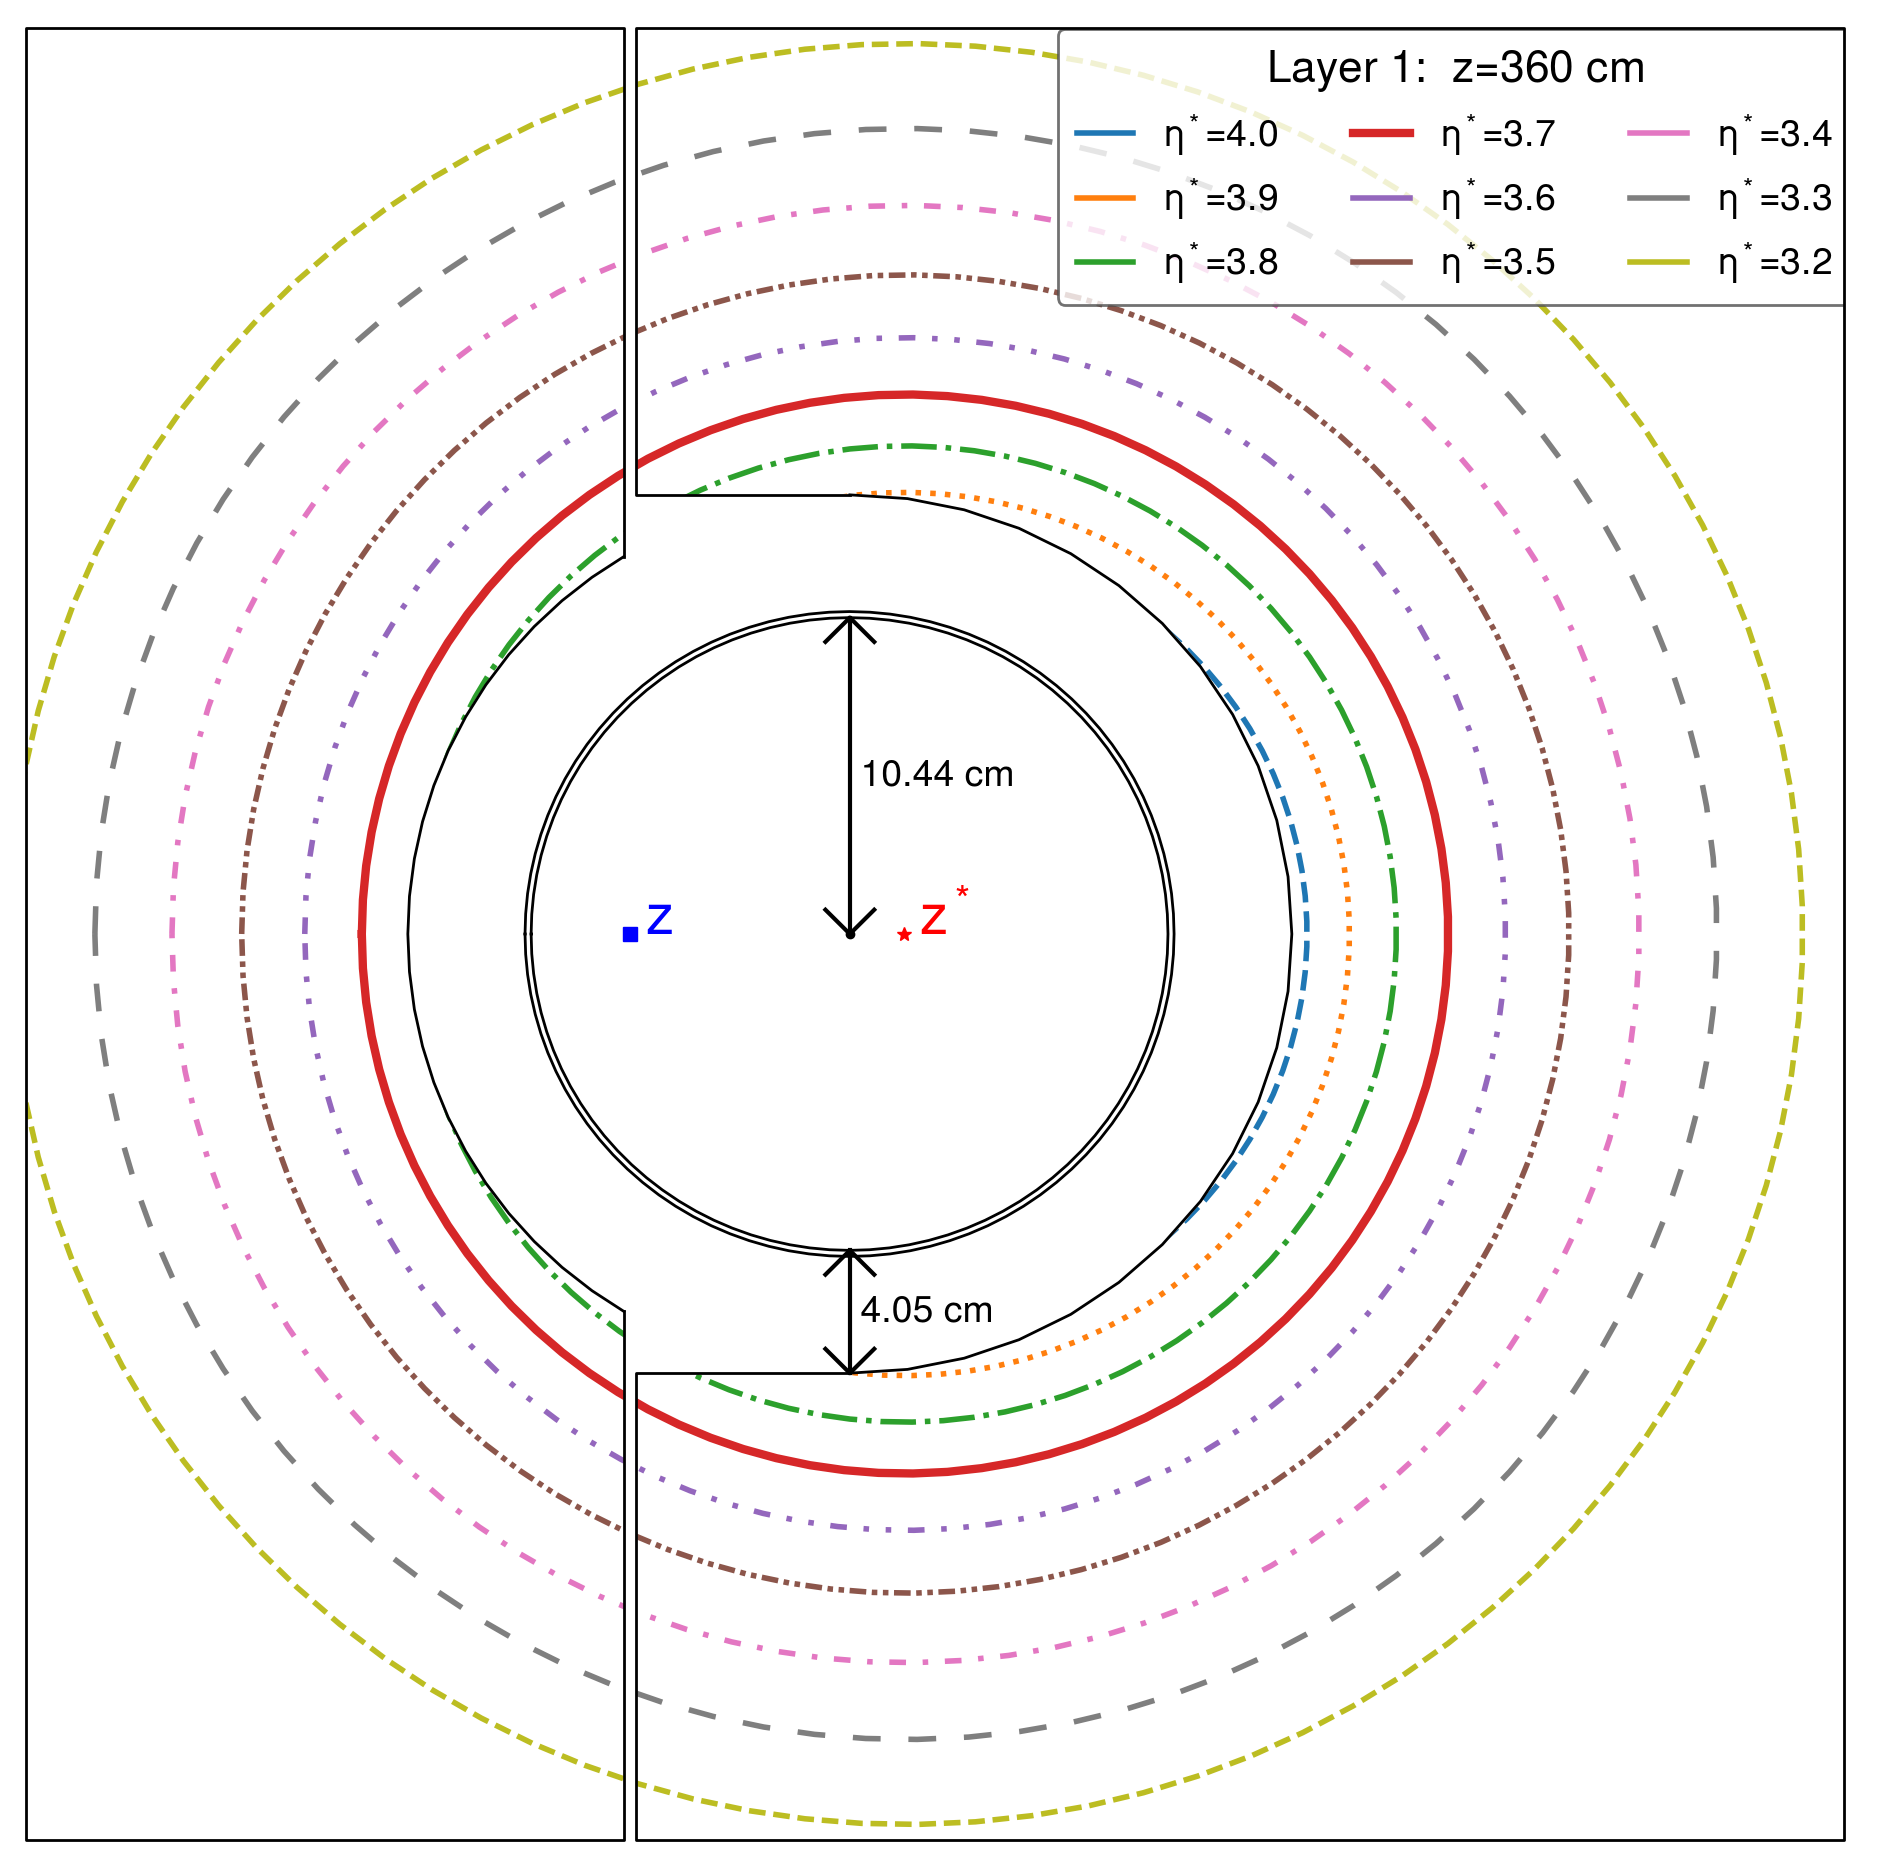

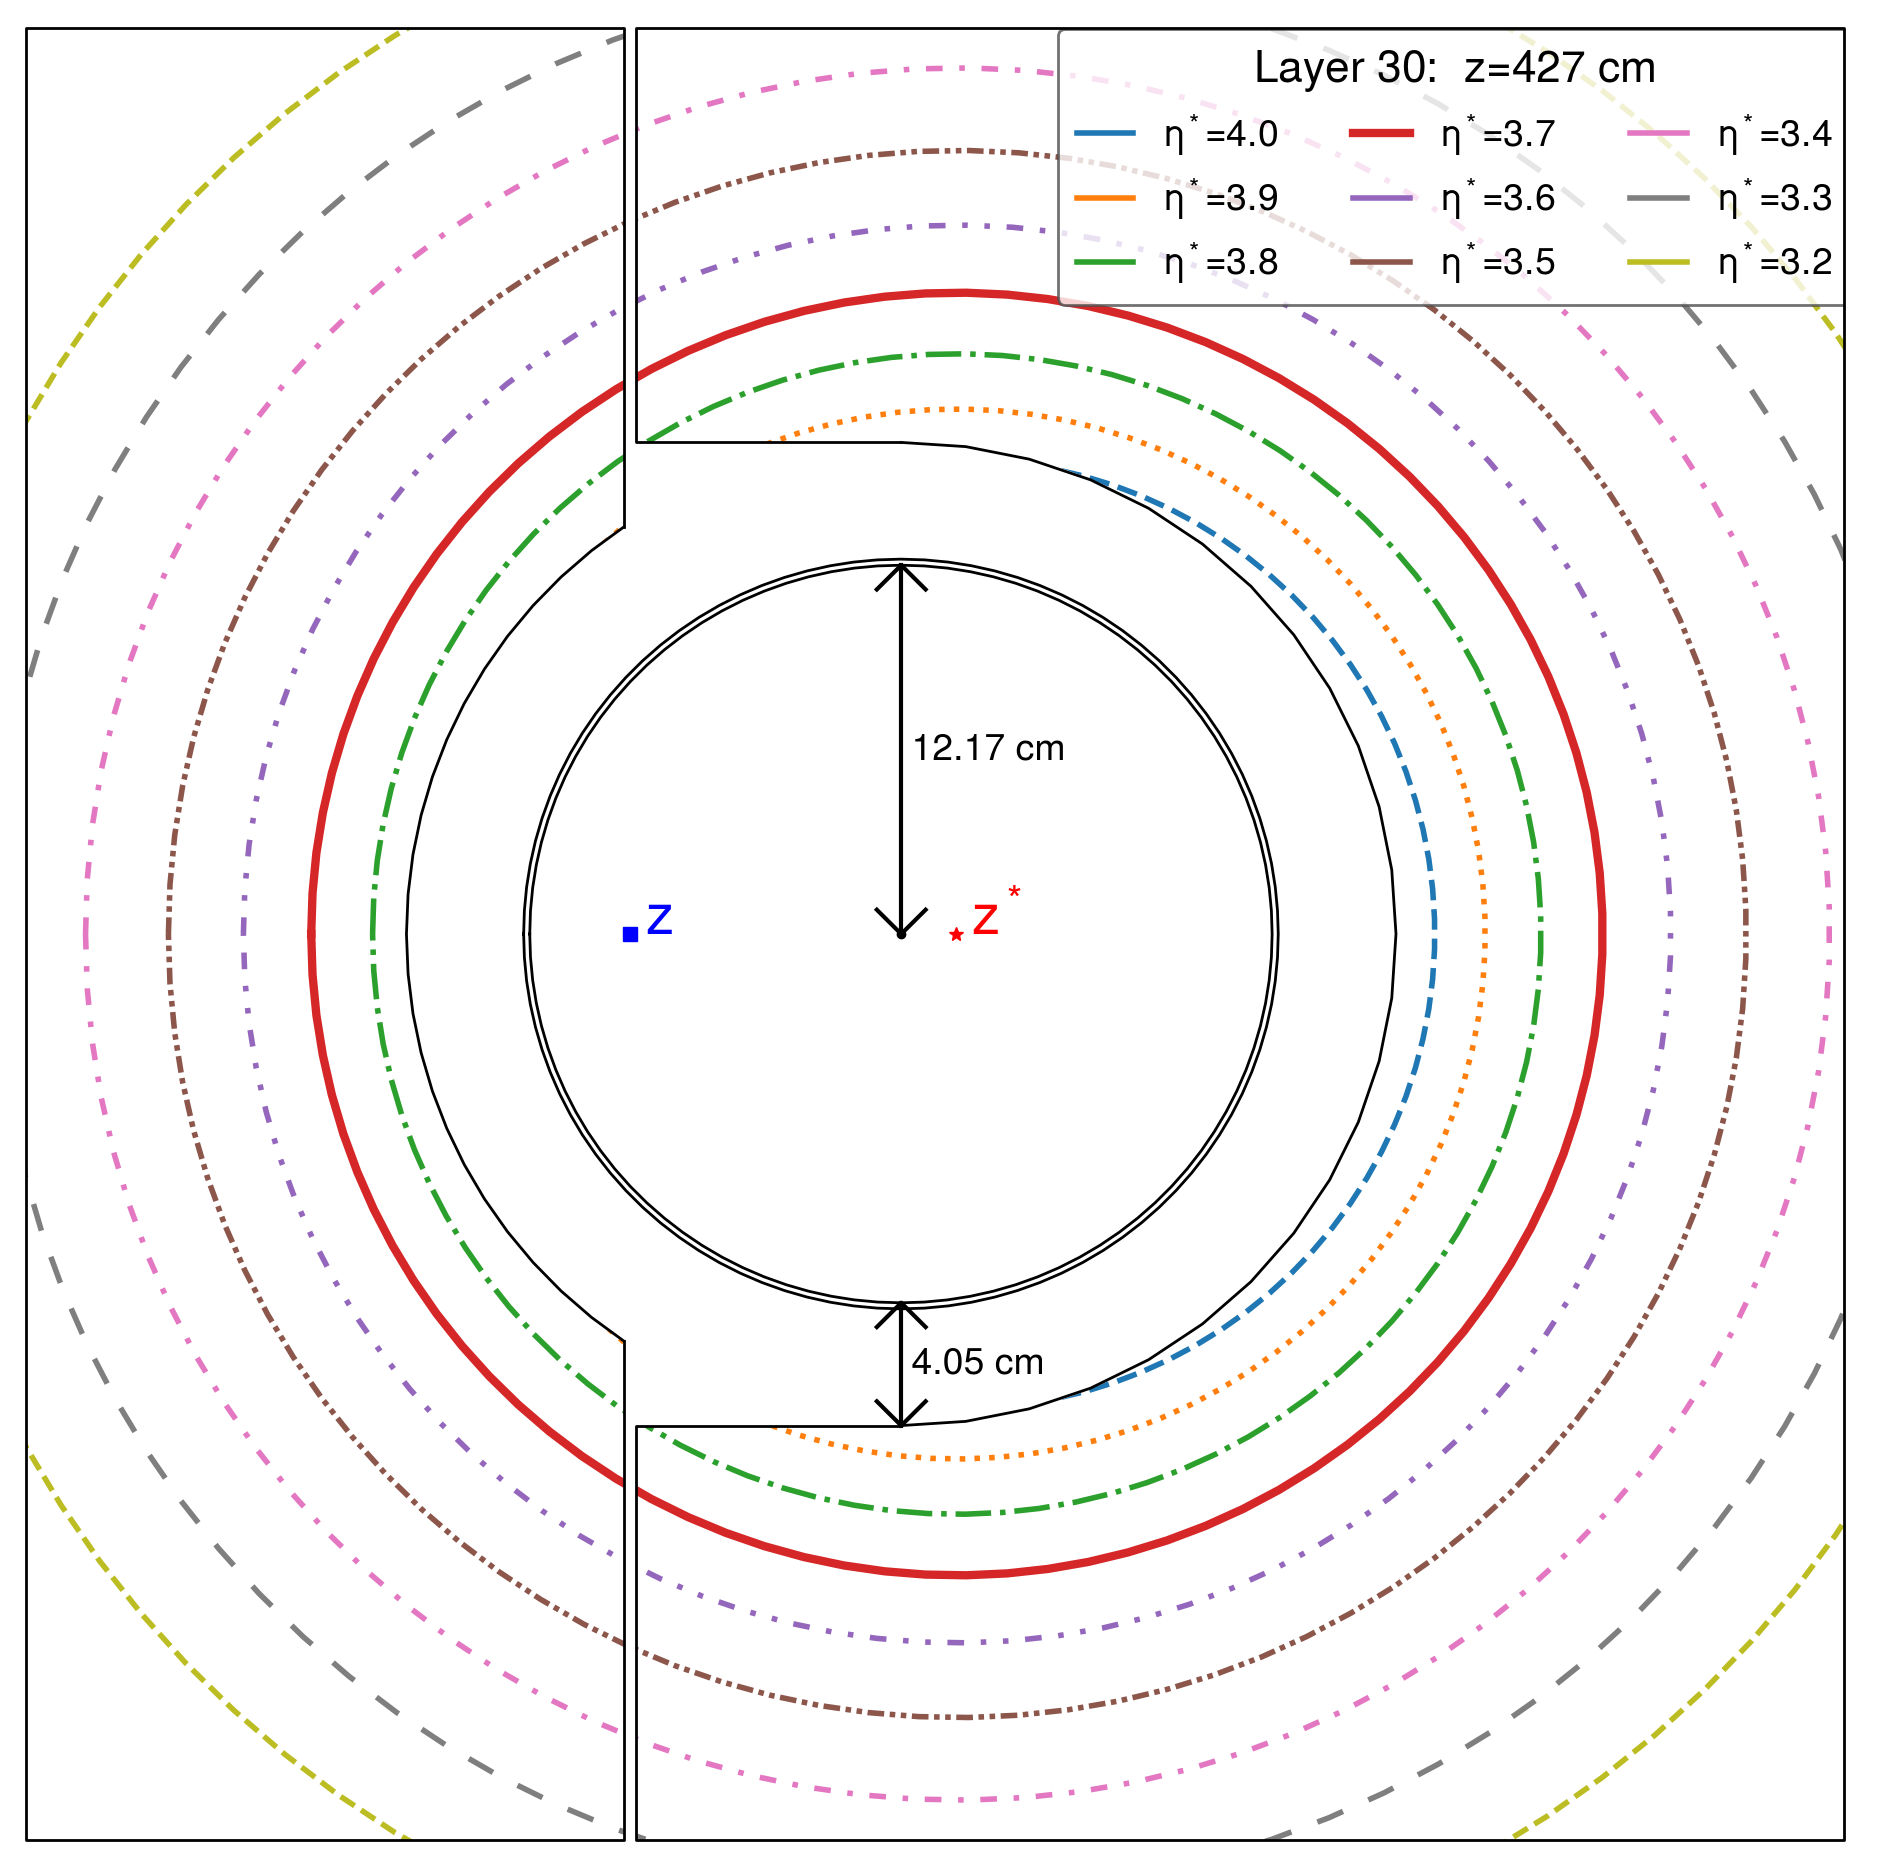

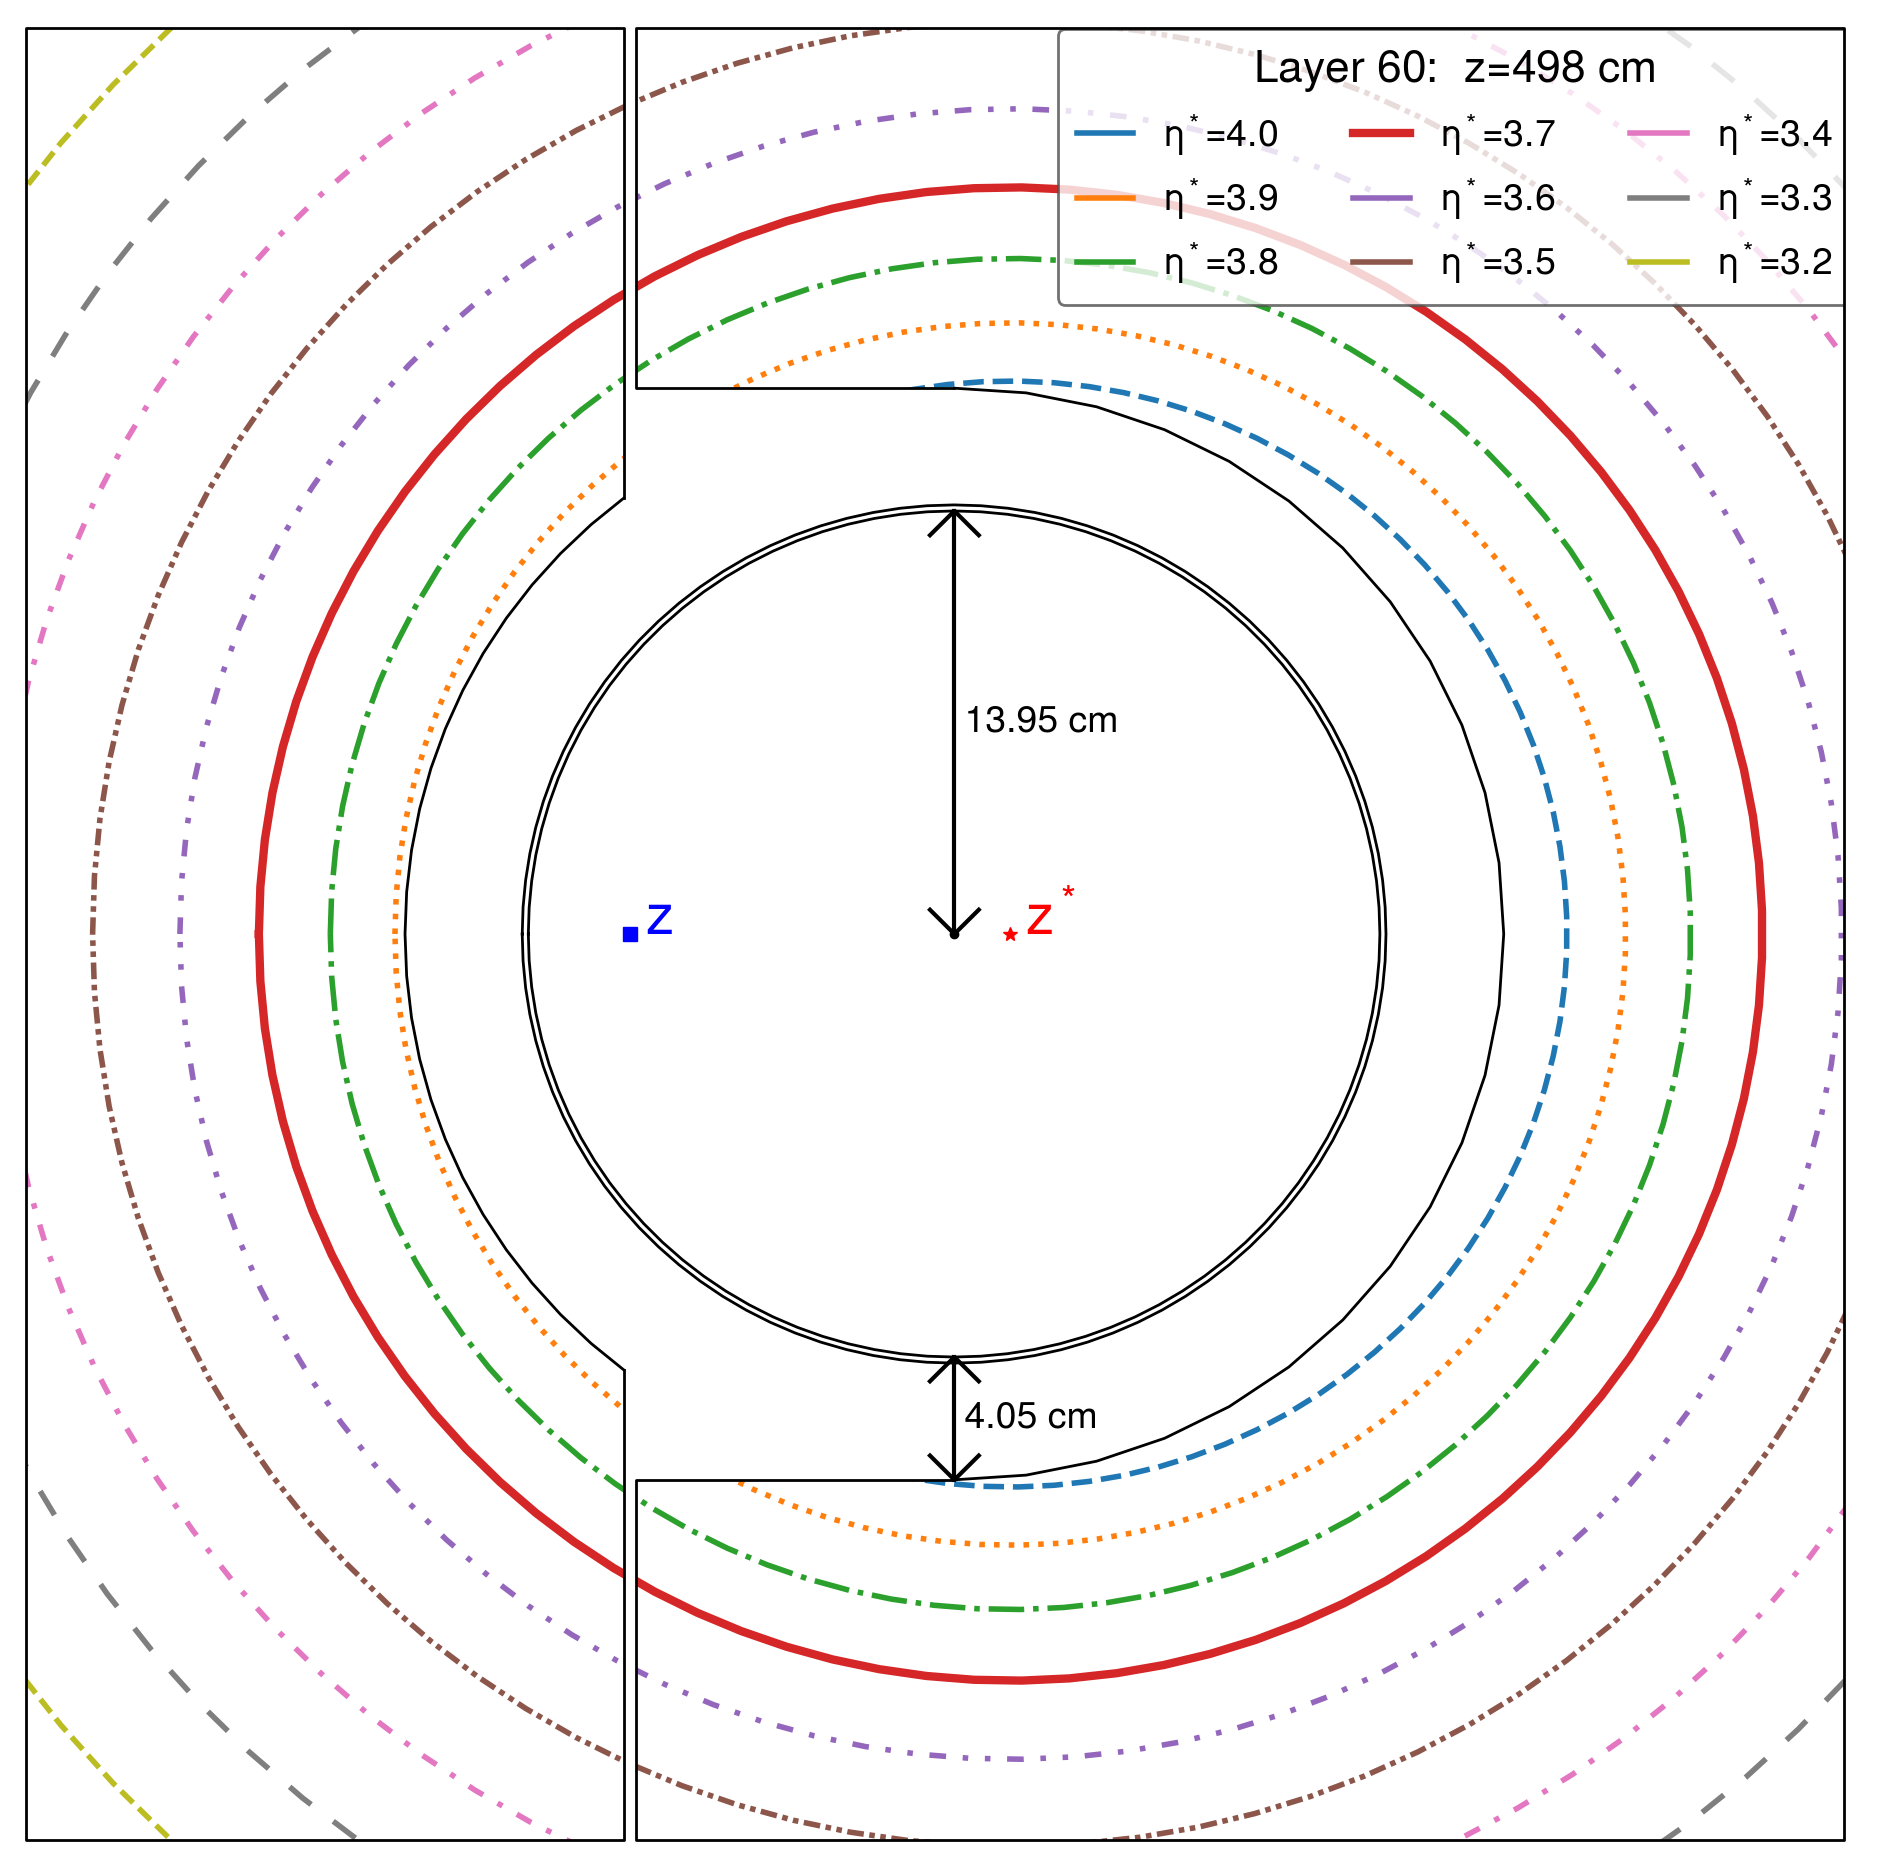

In [61]:
#similar to the plot in the HCal Insert paper, except 24 inch poster-sized plots
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox


beampipe=beampipe0

for i, layer in enumerate((0, 29, 59)):
    
    fig, ax= plt.subplots(1, 1, figsize=(24, 24), sharex=True, sharey=True)
    plt.sca(ax)
    eta_plot(layer, fontsize=27, linewidth_scale=2)
    #if layer != -1:
    #plt.title(f"Layer {layer+1}: z={beampipe.getZ(layer):.0f} cm", fontsize=27)
    #draw_hexagons(layer, hexArea[layer], alpha=0.2)
    draw_mask(layer, fontsize=27, linewidth=2)
        #plt.text(40, 30, f"clearance={clearance} cm", zorder=100)
    inch=2.54
    ax.set_xlim(-16*inch, 8*inch)
    ax.set_ylim(-12*inch, 12*inch)
    plt.gca().invert_xaxis()
    ax.axis('off')
    legend = ax.legend(ncol=3, loc="upper right", fontsize=27, frameon=True,framealpha=0.8,
              title=f"Layer {layer+1}:  $z$={beampipe.getZ(layer):.0f} cm",
             edgecolor='0.3', title_fontsize=32)
    legend.get_frame().set_linewidth(2)
    plt.savefig(f"layer_{layer}_poster.pdf")
    plt.show()


In [40]:
help(ax.legend)

Help on method legend in module matplotlib.axes._axes:

legend(*args, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Place a legend on the Axes.
    
    Call signatures::
    
        legend()
        legend(handles, labels)
        legend(handles=handles)
        legend(labels)
    
    The call signatures correspond to the following different ways to use
    this method:
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines

# draw the ECal in the same style:

In [ ]:
def draw_mask_ecal(z=643, beampipe=beampipe0, fontsize=18, linewidth=0.5):
    holeX=beampipe.holeX(0)
    holeR=beampipe.holeR(0)
    beampipeX=beampipe.beampipeX(layer)
    beampipeR=beampipe.beampipeR(layer)
    z=beampipe.getZ(layer)
    #D hole
    plt.gca().add_patch(plt.Circle((holeX, 0), holeR, color='#ffffff', zorder=99))    
    plt.gca().add_patch(plt.Rectangle((holeX, -holeR), -holeX, holeR*2, color='#ffffff', zorder=99))
    #top
    plt.gca().add_patch(plt.Rectangle((24.8-69.6,29.9), 69.6,4.8, color='#ffffff', zorder=99))
    #bottom
    plt.gca().add_patch(plt.Rectangle((24.8-69.6,-34.8), 69.6,-29.9+34.8, color='#ffffff', zorder=99))
    #right
    plt.gca().add_patch(plt.Rectangle((19.8,-34.8), -19.8+24.8,69.6, color='#ffffff', zorder=99))
    #left
    plt.gca().add_patch(plt.Rectangle((-39.8-5.0,-34.8), 5.0,69.6, color='#ffffff', zorder=99))
    
    #gap
    plt.gca().add_patch(plt.Rectangle((-0.2,-29.9), 0.4, 59.8, color='#ffffff', zorder=99))
    
    #draw beampipe
    phi= np.linspace(0, 2*np.pi, 101)
    plt.plot(beampipeX+beampipeR*np.cos(phi), beampipeR*np.sin(phi), color='k', linewidth=linewidth, zorder=100)
    plt.plot(beampipeX+(beampipeR+.2)*np.cos(phi), (beampipeR+.2)*np.sin(phi), color='k', linewidth=linewidth, zorder=100)



    #draw outline of sensor
    plt.plot([holeX,-.2,-.2,-39.8,-39.8, -.2, -.2, holeX], [-holeR,-holeR,-29.9, -29.9, 29.9, 29.9,holeR, holeR], 
             color='k', linewidth=linewidth,zorder=100)
    phi = np.linspace(-np.pi/2, np.pi/2, 25)
    plt.plot(holeX-np.cos(phi)*holeR, holeR*np.sin(phi), color='k', linewidth=linewidth, zorder=100)


    phi0 = np.arccos((holeX-.2)/holeR)
    plt.plot([.2,.2,19.8,19.8, .2, .2], [-holeR*np.sin(phi0),-29.9, -29.9, 29.9, 29.9, 
                                               holeR*np.sin(phi0)], color='k', linewidth=linewidth, zorder=100)
    phi = np.linspace(phi0,2*np.pi-phi0, 25)
    plt.plot(holeX-np.cos(phi)*holeR, holeR*np.sin(phi), color='k', linewidth=linewidth,zorder=100)
    
    #next label the z axis, beampipe center, and z* axis
    plt.plot([0],[0], marker="s", zorder=100, color='b')
    plt.text(0,0, " $z$", color='b', fontsize=fontsize, horizontalalignment='left', zorder=100)
    
    plt.plot([-z*.025],[0], marker='*', zorder=100, color='r')
    plt.text(-z*.025,0, " $z^*$", color='r', fontsize=fontsize, 
             horizontalalignment='left', zorder=100)
    
    #draw arrows indicating clearance and beampipe radii, including arrowheads
    arrowhead=0.8
    args=dict(marker="",linestyle='-', zorder=100, color='k', linewidth=linewidth*1.5)
    plt.plot([holeX, holeX],[0, beampipeR], **args)
    plt.plot([holeX+arrowhead, holeX, holeX-arrowhead], [beampipeR-arrowhead, beampipeR, beampipeR-arrowhead], **args)
    plt.plot([holeX+arrowhead, holeX, holeX-arrowhead], [arrowhead, 0, arrowhead], **args)
    plt.plot([holeX],[0], marker='o', zorder=100, color='k')
    plt.plot([holeX, holeX],[-beampipeR, -holeR], **args)
    plt.plot([holeX+arrowhead, holeX, holeX-arrowhead], [-beampipeR-arrowhead, -beampipeR, -beampipeR-arrowhead], **args)
    plt.plot([holeX+arrowhead, holeX, holeX-arrowhead], [-holeR+arrowhead, -holeR, -holeR+arrowhead], **args)
    plt.text(holeX, beampipeR/2, f" {beampipeR:.2f} cm", zorder=100, verticalalignment='center', fontsize=fontsize)
    plt.text(holeX, -(holeR+beampipeR)/2, f" {holeR-beampipeR:.2f} cm", zorder=100, verticalalignment='center', fontsize=fontsize)
    

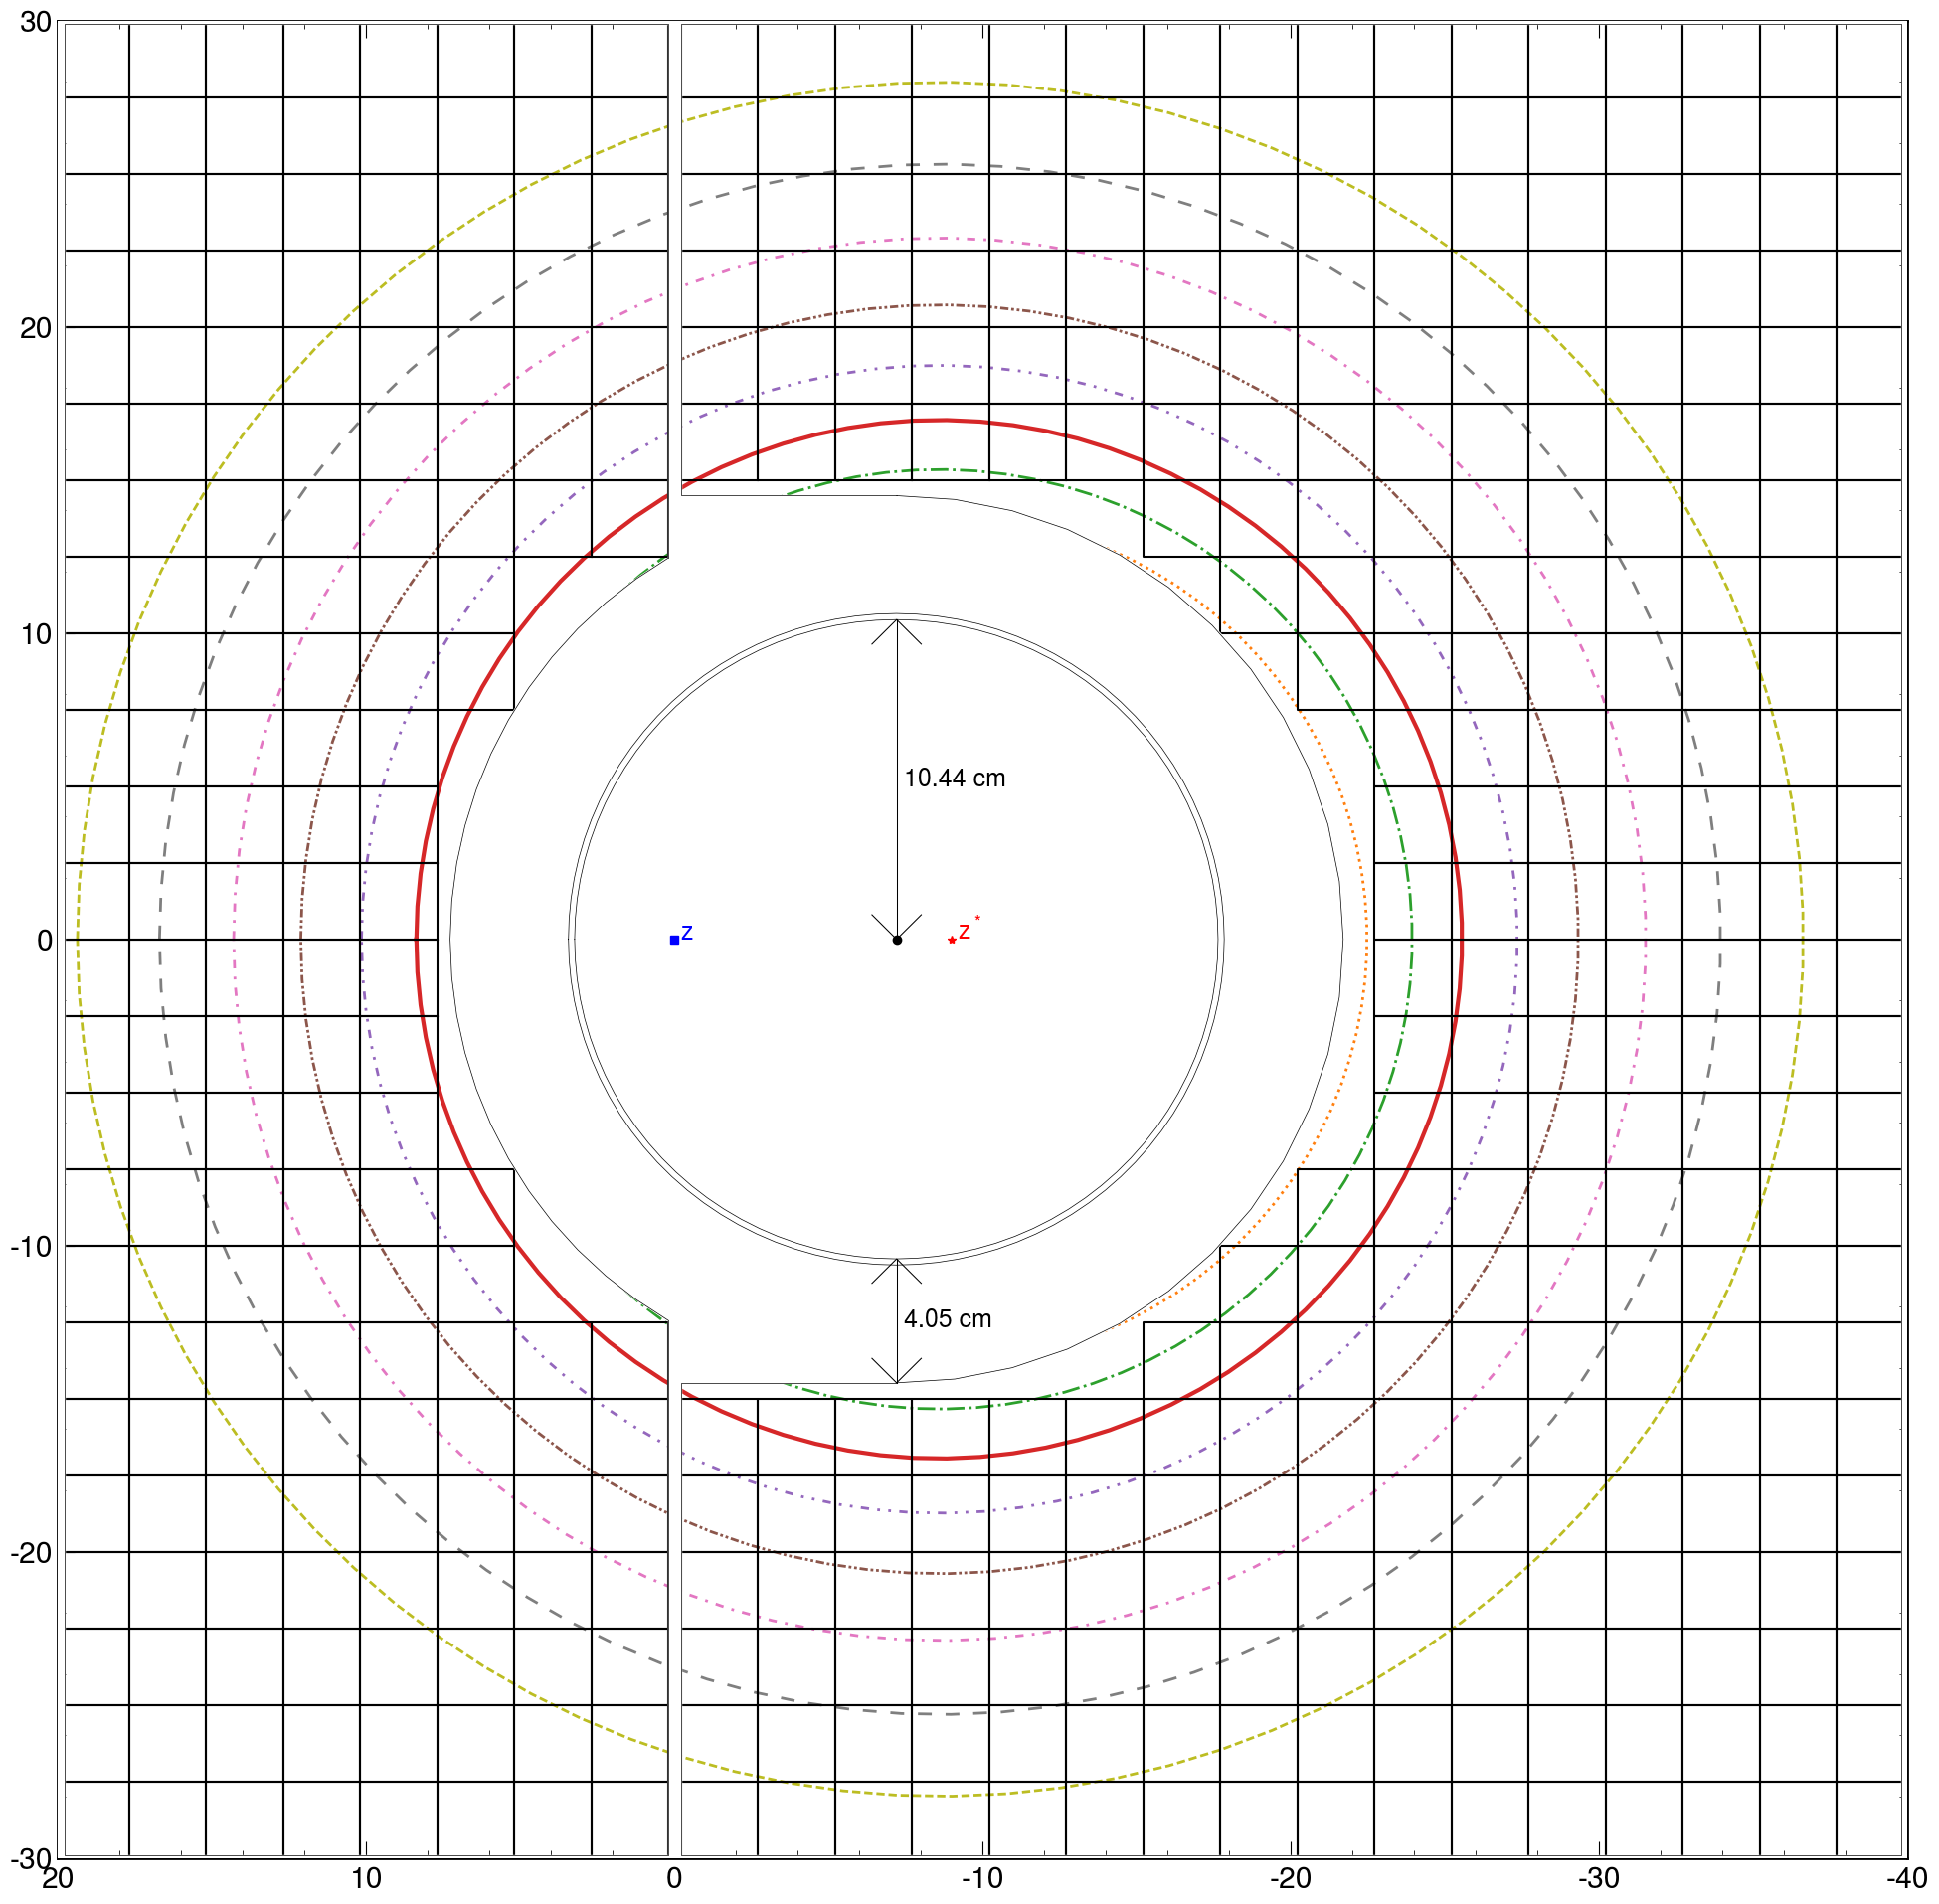

In [38]:

#only put Ecal blocks in the positions that are fully contained by the first layer of the HCal
holeX=beampipe0.holeX(0)
holeR=beampipe0.holeR(0)

fig, ax= plt.subplots(1, 1, figsize=(24, 24), sharex=True, sharey=True)
plt.sca(ax)
eta_plot(-17/2.34, fontsize=27)

for row in range(-12, 12):
    
    for col in range(-16, 8):
        skip=False
        for dc, dr in (0, 0), (1,0), (0,1), (1,1):
            if np.hypot((col+dc)*2.5+.2*np.sign(col+.1)-holeX, (row+dr)*2.5)<holeR:
                skip=True
        if skip:
            continue
        dr=np.array([0,1,1, 0, 0]); dc=np.array([0, 0, 1,1, 0])
        plt.plot((col+dc)*2.5+.2*np.sign(col+.1), (row+dr)*2.5,color='k')
draw_mask(0)
ax.set_xlim(-40, 20)
ax.set_ylim(-30, 30)
plt.gca().invert_xaxis()